# Wine Quality Prediction
<img src="https://media4.giphy.com/media/pzGIuR1UeI2oFhyqP1/giphy.gif?cid=ecf05e47k1l6gmzm7jl8swxlc4v7tb5b29pf2t1utciztc1f&rid=giphy.gif&ct=g"><br>
[GIF source](https://media4.giphy.com/media/pzGIuR1UeI2oFhyqP1/giphy.gif?cid=ecf05e47k1l6gmzm7jl8swxlc4v7tb5b29pf2t1utciztc1f&rid=giphy.gif&ct=g)<br>


## Contents:
1.   Introduction
2.   Aim
3.   Dataset
4.   Importing libraries
5.   Reading dataset
6.   Data Analysis & Visualization
7.   Data preprocessing
8.   Train & test split
9.   Prediction models:
        * RandomForestClassifier
        * DecisionTreeClassifier
        * AdaBoostClassifier
        * Gradient Boosting
10.  Accuracy score
11.  Confusion matrix
12.  Comparison between the models
13.  Conclusion
14.  References


## Introduction:
Wine is an alcoholic drink that is made up of fermented grapes. There are different types of wine such as red wine and white wine based on different varieties of grapes 🍇. The worldwide distribution of wine is 31 million tonnes.<br>
According to experts, the wine is differentiated according to its smell, flavor, and color, but we are not a wine expert to say that wine is good or bad. So we use Machine Learning to check the wine quality.

## Aim:
In this task we are going to predict the quality of wine i.e. to predict whether the wine quality is good(1) or bad(0) using three different ML models: RandomForestClassifier, DecisionTreeClassifier, AdaBoostClassifier, and Gradient Boosting and to see which yields the highest accuracy score.

## Dataset:
For this task, I have used Kaggle's [Red Wine Quality](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009) dataset. Each wine in this dataset is given a quality score between 0 and 10. The quality of a wine is determined by 11 input variables: Fixed acidity, Volatile acidity, Citric acid, Residual sugar, Chlorides, Free sulfur dioxide, Total sulfur dioxide, Density, pH, Sulfates, and Alcohol.

## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

## Reading dataset

In [ ]:
df = pd.read_csv('winequality-red.csv')
df.shape

(1599, 12)

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.isnull().sum()    #checking for null values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Data Analysis & Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


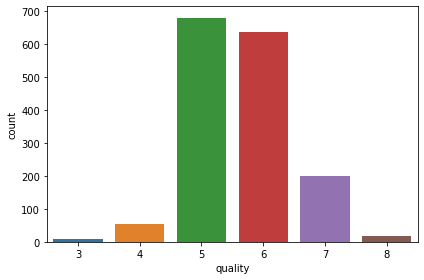

In [ ]:
sns.countplot(df['quality'])    #number of values for each quality
plt.tight_layout()

In [ ]:
df['quality'].value_counts()  #number of values for each quality

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [ ]:
df.describe()   #statistical measures of the dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 71.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 65.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 23.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


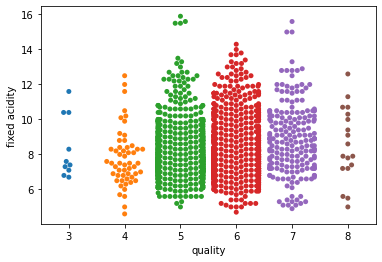

In [ ]:
#fixed acidity vs quality
sns.swarmplot(x= "quality", y="fixed acidity" , data = df) 

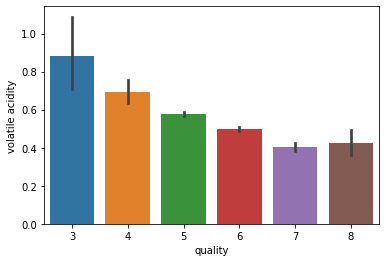

In [ ]:
#volatile acidity vs quality
sns.barplot(x='quality', y='volatile acidity', data = df)

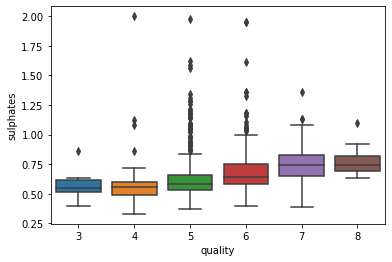

In [ ]:
#sulphates vs quality
sns.boxplot(x="quality", y="sulphates", data = df )

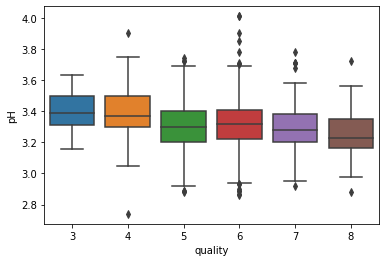

In [ ]:
#pH vs quality
sns.boxplot(x="quality", y="pH", data = df )

### Correlation

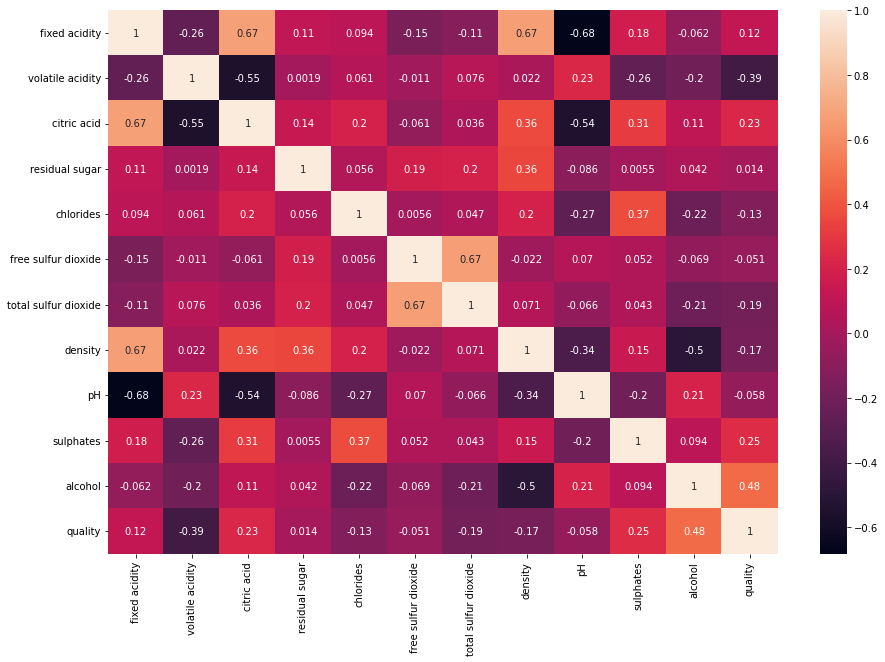

In [ ]:
#understanding the relationship between variables
correlation = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

## Data Preprocessing

In [ ]:
X = df.drop('quality', axis=1)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [ ]:
#label binarization
#replace all the values with quality score <= 6 with 0 and quality score >=7 with 1
Y = df['quality'].apply(lambda val: 1 if val>=7 else 0)
Y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [ ]:
Y.value_counts()

0    1382
1     217
Name: quality, dtype: int64

## Train and test split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [ ]:
print("Shape of x_train data: ", x_train.shape)
print("Shape of x_test data: ", x_test.shape)

Shape of x_train data:  (1279, 11)
Shape of x_test data:  (320, 11)


In [ ]:
x_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
606,9.4,0.41,0.48,4.6,0.072,10.0,20.0,0.99730,3.34,0.79,12.2
362,11.9,0.58,0.66,2.5,0.072,6.0,37.0,0.99920,3.05,0.56,10.0
533,10.3,0.27,0.24,2.1,0.072,15.0,33.0,0.99560,3.22,0.66,12.8
1397,7.3,0.59,0.26,2.0,0.080,17.0,104.0,0.99584,3.28,0.52,9.9
733,7.0,0.45,0.34,2.7,0.082,16.0,72.0,0.99800,3.55,0.60,9.5
...,...,...,...,...,...,...,...,...,...,...,...
789,8.6,0.63,0.17,2.9,0.099,21.0,119.0,0.99800,3.09,0.52,9.3
256,9.4,0.34,0.37,2.2,0.075,5.0,13.0,0.99800,3.22,0.62,9.2
968,9.0,0.40,0.43,2.4,0.068,29.0,46.0,0.99430,3.20,0.60,12.2
952,8.2,0.31,0.40,2.2,0.058,6.0,10.0,0.99536,3.31,0.68,11.2


## Prediction Models

### Method 1: Random Forest
Random forest is an ensemble model. Ensemble models are those that use more than two or three models in combination for prediction. Ensemble uses two types of methods: Bagging and Boosting. Random forest works on the Bagging principle. Bagging chooses a random sample from the dataset.Hence each model (individual decision tree) is generated from the samples known as row sampling. This step of row sampling with replacement is called bootstrap. Each model is trained independently which generates results. The final answer is based on majority voting after combining the results of all the models. This step is known as aggregation.

In [ ]:
rf_model = RandomForestClassifier()

In [ ]:
rf_model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf_y_pred = rf_model.predict(x_test)

In [ ]:
x_predict = list(rf_y_pred)
rf_predicted_df = {'predicted_values': x_predict, 'original_values': y_test}
pd.DataFrame(rf_predicted_df).head(20)

,predicted_values,original_values
147,0,0
937,0,0
877,0,0
1000,0,1
73,0,0
31,0,0
266,0,0
1403,0,1
263,0,0
1491,0,0


### Accuracy score

In [ ]:
rf_accuracy = accuracy_score(rf_y_pred, y_test)
print("Accuracy using Random Forest: ", rf_accuracy)

Accuracy using Random Forest:  0.928125


In [ ]:
#precision calculates the value that says out of all total predicted positive sentiment how many were actually positive
#recall calculates the value that says out of all actual positives how many were predicted correctly positive.
print(classification_report(y_test, rf_y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       283
           1       0.75      0.57      0.65        37

    accuracy                           0.93       320
   macro avg       0.85      0.77      0.80       320
weighted avg       0.92      0.93      0.92       320



### Confusion matrix

Random Forest:
[[276   7]
 [ 16  21]]


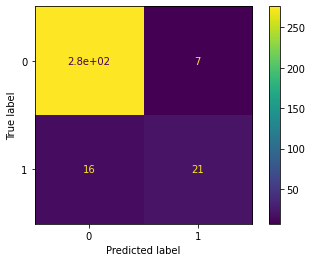

In [ ]:
#performance measurement for classification problem 
print('Random Forest:')
cm = confusion_matrix(y_test, rf_y_pred, rf_model.classes_)
print(cm)
matrix = ConfusionMatrixDisplay(cm, rf_model.classes_)
matrix.plot()

### Method 2: Decision Tree
A decision tree is a graphical representation of all the possible solutions to a decision based on some conditions.

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dt_y_pred = dt_model.predict(x_test)

In [ ]:
x_predict = list(dt_y_pred)
dt_predicted_df = {'predicted_values': x_predict, 'original_values': y_test}
pd.DataFrame(dt_predicted_df).head(20)

,predicted_values,original_values
147,0,0
937,0,0
877,0,0
1000,1,1
73,0,0
31,0,0
266,0,0
1403,0,1
263,0,0
1491,0,0


### Accuracy score

In [ ]:
dt_accuracy = accuracy_score(dt_y_pred, y_test)
print("Accuracy using Decision Tree: ", dt_accuracy)

Accuracy using Decision Tree:  0.909375


In [ ]:
print(classification_report(y_test, dt_y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       283
           1       0.60      0.65      0.62        37

    accuracy                           0.91       320
   macro avg       0.78      0.80      0.79       320
weighted avg       0.91      0.91      0.91       320



### Confusion matrix

Decision Tree:
[[267  16]
 [ 13  24]]


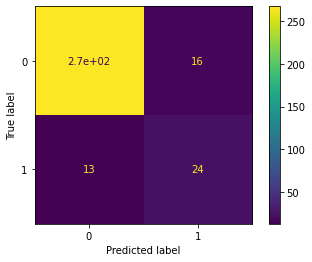

In [ ]:
print("Decision Tree:")
cm = confusion_matrix(y_test, dt_y_pred, dt_model.classes_)
print(cm)
matrix = ConfusionMatrixDisplay(cm, dt_model.classes_)
matrix.plot()

### Method 3: AdaBoost
This is a boosting algorithm that combines weak learners to form strong learners by creating sequential models to increase the accuracy of the model. It is developed for the classification problems. In each iteration, AdaBoost identifies miss-classified data points, increasing their weights (and decrease the weights of correct points, in a sense) so that the next classifier will pay extra attention to get them right.

In [ ]:
ad_model = AdaBoostClassifier()

In [ ]:
ad_model.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [ ]:
ad_y_pred = ad_model.predict(x_test)

In [ ]:
x_predict = list(ad_y_pred)
ad_predicted_df = {'predicted_values': x_predict, 'original_values': y_test}
pd.DataFrame(ad_predicted_df).head(20)

,predicted_values,original_values
147,0,0
937,0,0
877,0,0
1000,0,1
73,0,0
31,0,0
266,0,0
1403,1,1
263,0,0
1491,0,0


### Accuracy score

In [ ]:
ad_accuracy = accuracy_score(ad_y_pred, y_test)
print("Accuracy using AdaBoost: ", ad_accuracy)

Accuracy using AdaBoost:  0.925


In [ ]:
print(classification_report(y_test, ad_y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       283
           1       0.70      0.62      0.66        37

    accuracy                           0.93       320
   macro avg       0.82      0.79      0.81       320
weighted avg       0.92      0.93      0.92       320



### Confusion matrix

AdaBoost:
[[273  10]
 [ 14  23]]


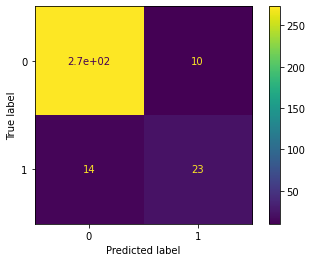

In [ ]:
print("AdaBoost:")
cm = confusion_matrix(y_test, ad_y_pred, ad_model.classes_)
print(cm)
matrix = ConfusionMatrixDisplay(cm, ad_model.classes_)
matrix.plot()

### Method 4: Gradient Boosting
The main idea of boosting is to sequentially combine many weak models and create a strong model.
Gradient boosting is a type of machine learning algorithm. It is an iterative algorithm. It is based on decision trees. So you built one decision tree then after that you built another decision tree to minimize the error. And then you keep repeating.
Gradient boosting approach can use for both the regression and classification problems.

In [ ]:
gb_model = GradientBoostingClassifier()

In [ ]:
gb_model.fit(x_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
gb_y_pred = gb_model.predict(x_test)

In [ ]:
x_predict = list(gb_y_pred)
gb_predicted_df = {'predicted_values': x_predict, 'original_values': y_test}
pd.DataFrame(gb_predicted_df).head(20)

,predicted_values,original_values
147,0,0
937,0,0
877,0,0
1000,0,1
73,0,0
31,0,0
266,0,0
1403,0,1
263,0,0
1491,0,0


### Accuracy score

In [ ]:
gb_accuracy = accuracy_score(gb_y_pred, y_test)
print("Accuracy using Gradient Boosting: ", gb_accuracy)

Accuracy using Gradient Boosting:  0.9375


In [ ]:
print(classification_report(y_test, gb_y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       283
           1       0.77      0.65      0.71        37

    accuracy                           0.94       320
   macro avg       0.86      0.81      0.84       320
weighted avg       0.93      0.94      0.94       320



### Confusion matrix

Gradient Boosting:
[[276   7]
 [ 13  24]]


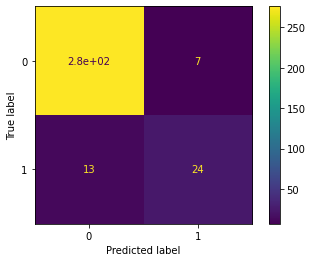

In [ ]:
print("Gradient Boosting:")
cm = confusion_matrix(y_test, gb_y_pred, gb_model.classes_)
print(cm)
matrix = ConfusionMatrixDisplay(cm, gb_model.classes_)
matrix.plot()

## Comparison between the Models

In [ ]:
comp_df = pd.DataFrame()
comp_df['Model name'] = ['Random Forest', 'Decision Tree', 'AdaBoost', 'Gradient Boosting']
comp_df['Accuracy score'] = [0.928, 0.909, 0.925, 0.937]
comp_df

,Model name,Accuracy score
0,Random Forest,0.928
1,Decision Tree,0.909
2,AdaBoost,0.925
3,Gradient Boosting,0.937


([0, 1, 2, 3], <a list of 4 Text major ticklabel objects>)

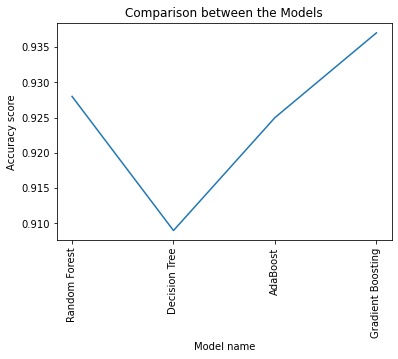

In [ ]:
sns.lineplot(x='Model name', y='Accuracy score', data = comp_df)
plt.title('Comparison between the Models')
plt.xticks(rotation=90)

## Conclusion
In this task, I have used three machine learning models to classify wine quality into good or bad i.e. 1 or 0.<br>
Gradient Boosting algorithm stand out to be the best model among all the models based on the accuracy score.<br>
The accuracy score for:
* Gradient Boosting model is 0.937
* Random Forest model is 0.928
* Decision Tree is 0.909
* AdaBoost model is 0.925.

## References
* https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/
* https://towardsdatascience.com/understanding-random-forest-58381e0602d2
* https://towardsdatascience.com/boosting-algorithms-explained-d38f56ef3f30